In [22]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")

In [23]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
def mae(y, y_pred):
    return ((y - y_pred).abs()).mean()
def mape(y, y_pred):
    return ((y - y_pred).abs() / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Using Multiple Linear Regression for Additive Models

ultiple Linear Regression (MLR) can be used for Additive Models in time series analysis to predict the values of a dependent variable based on two or more independent variables. The basic idea behind using MLR is to decompose the time series into its additive components and then model each component separately as a function of one or more independent variables. The estimated values of the additive components are then added together to obtain the predicted values of the dependent variable.

The general equation for an additive model with MLR can be written as:

Y(t) = f(T) + S(t) + I(t)

Where Y(t) represents the value of the dependent variable at time t, T represents the trend component, S(t) represents the seasonal component, and I(t) represents the irregular component. The function f(T) is a function of one or more independent variables that captures the relationship between the trend component and the independent variables.

To use MLR for additive models, we first need to decompose the time series into its additive components using techniques such as STL (Seasonal and Trend decomposition using Loess) or Classical Decomposition. Once we have the additive components, we can then model each component separately using MLR. The independent variables used to model each component can be the same or different depending on the nature of the component and the available data.

For example, to model the trend component as a function of an independent variable, we can use the following equation:

T(t) = β0 + β1X1(t) + β2X2(t) + ... + βkXk(t)

Where T(t) represents the trend component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and β0, β1, β2, ..., βk are the coefficients that represent the relationship between the trend component and the independent variables.

Similarly, to model the seasonal component as a function of an independent variable, we can use the following equation:

S(t) = γ0 + γ1X1(t) + γ2X2(t) + ... + γkXk(t)

Where S(t) represents the seasonal component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and γ0, γ1, γ2, ..., γk are the coefficients that represent the relationship between the seasonal component and the independent variables.

Finally, to model the irregular component as a function of an independent variable, we can use the following equation:

I(t) = ε0 + ε1X1(t) + ε2X2(t) + ... + εkXk(t)

Where I(t) represents the irregular component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and ε0, ε1, ε2, ..., εk are the coefficients that represent the relationship between the irregular component and the independent variables.

Once we have estimated the coefficients for each component, we can then use the equations to predict the values of the dependent variable at any point in time by summing the predicted values of each component.

Overall, MLR can be a useful tool for modeling additive models in time series analysis, especially when we have multiple independent variables that may affect different components of the time series. However, it is important to ensure that the assumptions of MLR are met, such as linearity, normality, homoscedasticity, and independence of errors, before applying it to time series data.

MAE: 5.259989974446297e-14
RMSE: 6.422239031165233e-14
MAPE: 1.8281416595513634e-14


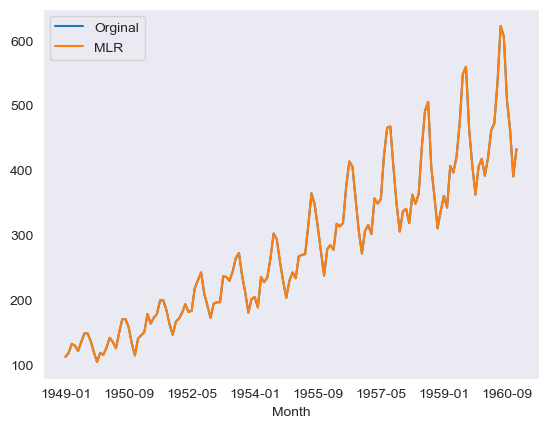

In [19]:
from sklearn.linear_model import LinearRegression


# Load the time series data into a numpy array
df = pd.read_csv('AirPassengers.csv')
# Set the index of the DataFrame to the date column
df.set_index('Month', inplace=True)
# Here, we assume that the time series has a seasonal period of 12
from statsmodels.tsa.seasonal import STL
stl = STL(df['#Passengers'], period=12)
res = stl.fit()
trend = res.trend
seasonal = res.seasonal
residuals = res.resid
# Define the dependent variable and the independent variables for each component
y_trend = trend
X_trend = df
y_seasonal = seasonal
X_seasonal = df

y_residuals = residuals
X_residuals = df

# Fit the linear regression models for each component
reg_trend = LinearRegression().fit(X_trend, y_trend)
reg_seasonal = LinearRegression().fit(X_seasonal, y_seasonal)
reg_residuals = LinearRegression().fit(X_residuals, y_residuals)

# Use the X_residualsredict the values of the dependent variable
y_pred_trend = reg_trend.predict(X_trend)
y_pred_seasonal = reg_seasonal.predict(X_seasonal)
y_pred_residuals = reg_residuals.predict(X_residuals)

# Combine the predicted values of each component to obtain the predicted values of the dependent variable
y_pred = y_pred_trend + y_pred_seasonal + y_pred_residuals
df['MLR_forecast'] = y_pred
# Plot visulization
df['#Passengers'].plot()
df['MLR_forecast'].plot()
plt.legend(['Orginal', 'MLR'])
# print evaltion 
evaluate(df['#Passengers'], df['MLR_forecast'])